Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

def exercise_0(file): # Load the data
    df = pd.read_csv(file)
    return df

def exercise_1(df): # Get the columns
    columns = df.columns
    return list(columns)

def exercise_2(df, k): # Get the first k rows
    return df.head(k)

def exercise_3(df, k): # Get the random k rows
    return df.sample(k)

def exercise_4(df): # Get the unique rows
    return df.drop_duplicates()
    
def exercise_5(df): # top 10 transactions destinations with frequency
    return df['nameDest'].value_counts().head(10)

def exercise_6(df): # all rows with fraud = 1
    return df[df['isFraud'] == 1]

def exercise_7(df): # Frequency of distinct destinations which each source interacts with in descending order
    return df.groupby('nameOrig')['nameDest'].nunique().sort_values(ascending=False)

def visual_1(df):
    def transaction_counts(df): # Transaction types
        # TODO
        return df['type'].value_counts()
    def transaction_counts_split_by_fraud(df): # Transaction types split by fraud
        # TODO
        return df.groupby(['type', 'isFraud']).size().unstack().fillna(0)

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Transaction types')
    axs[0].set_xlabel('Transaction type')
    axs[0].set_ylabel('Frequency')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Transaction types split by fraud')
    axs[1].set_xlabel('Transaction type')
    axs[1].set_ylabel('Frequency')
    fig.suptitle('Visual Representation of the required Exercise', fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return fig

def visual_2(df):
    def query(df):
        return df[(df['type'] == 'CASH_OUT') & (df['isFraud'] == 1)]
        
    plot = query(df).plot.scatter(x='oldbalanceOrg', y='newbalanceOrig', c='oldbalanceDest')
    plot.set_title('Origin account balance delta v.')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return plot

def exercise_custom(df): # function to get the differences between the old and new balances of the origin accounts for fraudulent transactions
    return df[df['isFraud'] == 1]['newbalanceOrig'] - df[df['isFraud'] == 1]['oldbalanceOrg']
    
def visual_custom(df): # Use the custom function to plot a scatter plot
    plot = df.plot.scatter(x='oldbalanceOrg', y='newbalanceOrig')
    plot.set_title('newbalanceOrig v. oldbalanceOrg')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return plot

In [37]:
df = exercise_0('transactions.csv')

In [73]:
# Test exercises here
#print(exercise_1(df))
#print(exercise_2(df, 5))
#print(exercise_3(df, 5))
#print(exercise_4(df))
#print(exercise_5(df))
#print(exercise_6(df))
#print(exercise_7(df))
#visual_1(df)
#visual_2(df)
print(exercise_custom(df))
#visual_custom(df)

2            -181.00
3            -181.00
251         -2806.00
252         -2806.00
680        -20128.00
             ...    
182862       -408.00
193765     -48375.02
193766     -48375.02
196775   -4022667.54
196776   -4022667.54
Length: 147, dtype: float64


Create graphs for the following. 
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes
 
The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

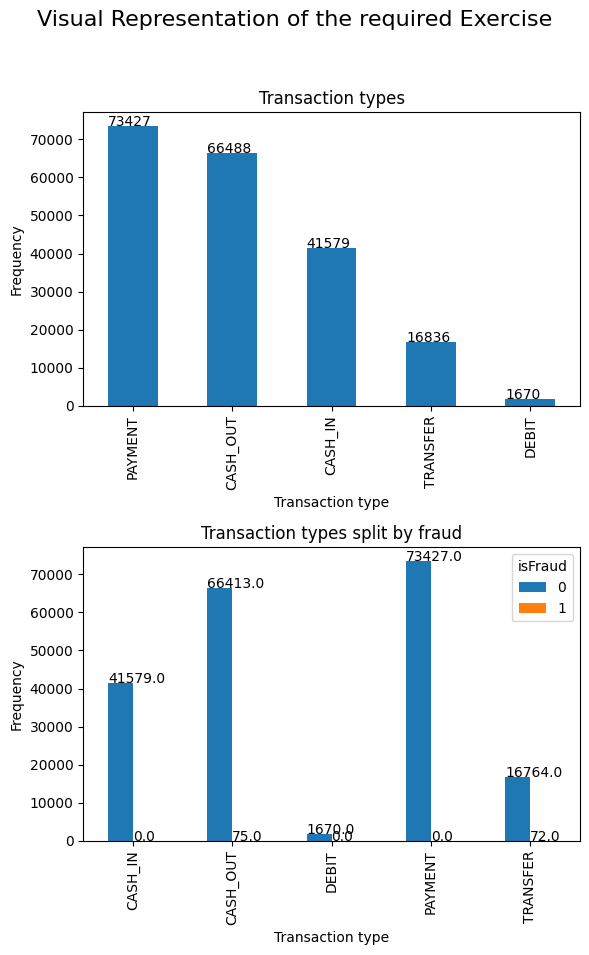

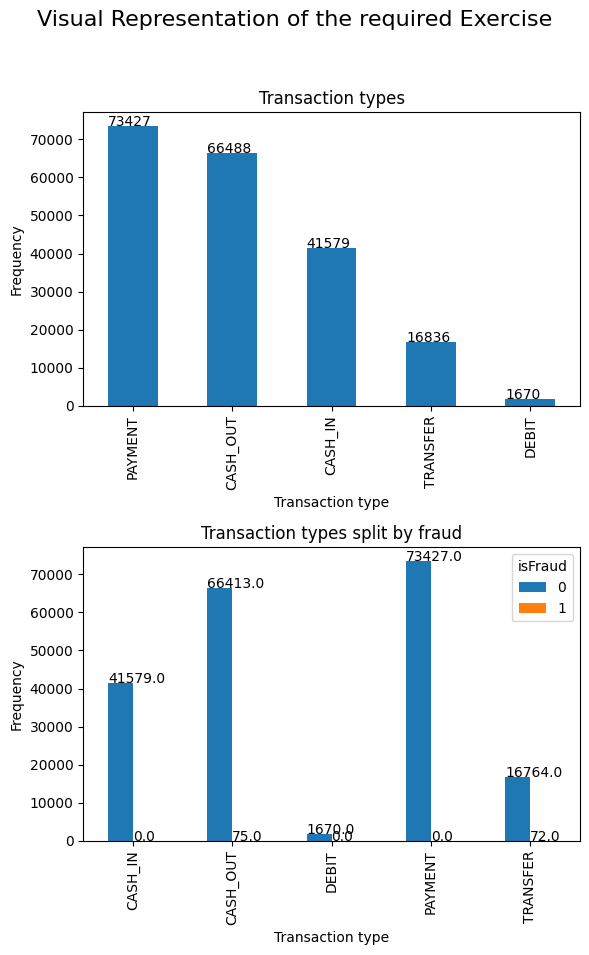

In [45]:
def visual_1(df):
    def transaction_counts(df): # Transaction types
        return df['type'].value_counts()
    def transaction_counts_split_by_fraud(df): # Transaction types split by fraud
        return df.groupby(['type', 'isFraud']).size().unstack().fillna(0)

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Transaction types')
    axs[0].set_xlabel('Transaction type')
    axs[0].set_ylabel('Frequency')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Transaction types split by fraud')
    axs[1].set_xlabel('Transaction type')
    axs[1].set_ylabel('Frequency')
    fig.suptitle('Visual Representation of the required Exercise', fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return fig

visual_1(df)


<Axes: title={'center': 'Origin account balance delta v.'}, xlabel='oldbalanceOrg', ylabel='newbalanceOrig'>

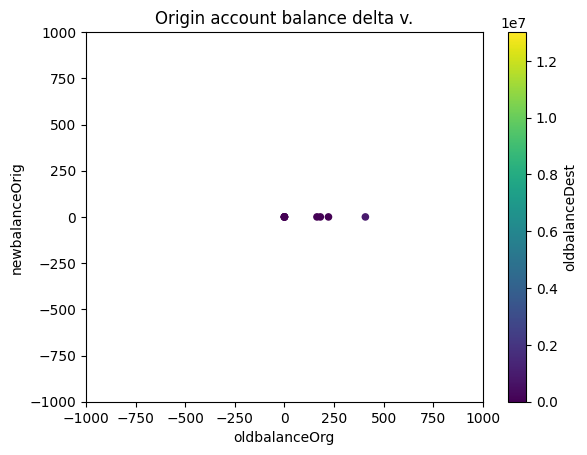

In [51]:
def visual_2(df): #Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions
    def query(df):
        return df[(df['type'] == 'CASH_OUT') & (df['isFraud'] == 1)]
        
    plot = query(df).plot.scatter(x='oldbalanceOrg', y='newbalanceOrig', c='oldbalanceDest')
    plot.set_title('Origin account balance delta v.')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return plot

visual_2(df)


Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query. `visual_custom` should call `exercise_custom`.

In [74]:
def exercise_custom(df):
    return df[df['isFraud'] == 1]['newbalanceOrig'] - df[df['isFraud'] == 1]['oldbalanceOrg']
    
def visual_custom(df):
    plot = df.plot.scatter(x='oldbalanceOrg', y='newbalanceOrig')
    plot.set_title('newbalanceOrig v. oldbalanceOrg')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return plot

Submission

1. Copy the exercises into `task1.py`.
2. Upload `task1.py` to Forage.

All done!

Your work will be instrumental for our team's continued success.